In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-darkgrid')
sns.set_style("darkgrid") 

In [4]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
corr = df.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


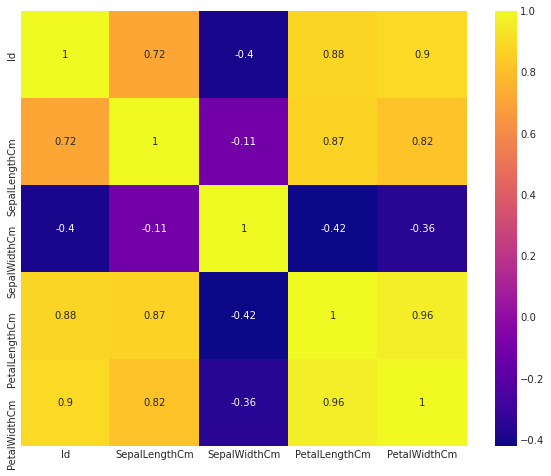

In [9]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr,  cmap = 'plasma', annot= True);

# Exploratory analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

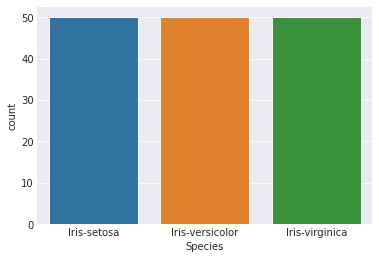

In [10]:
sns.countplot(df["Species"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


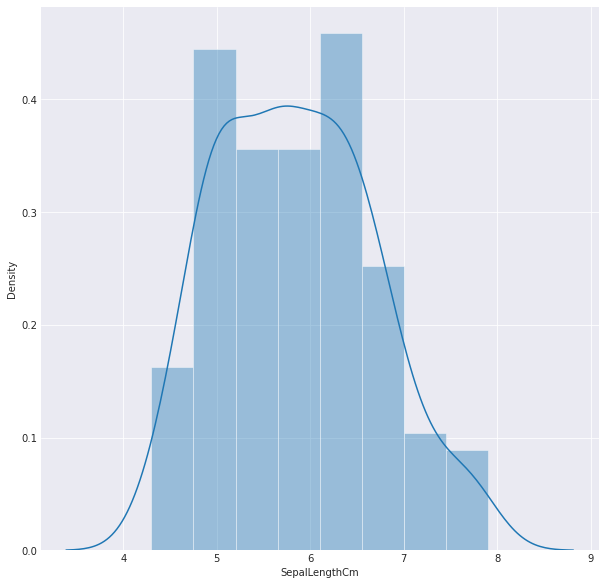

In [11]:
plt.figure(figsize=(10, 10))

sns.distplot(df["SepalLengthCm"]);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


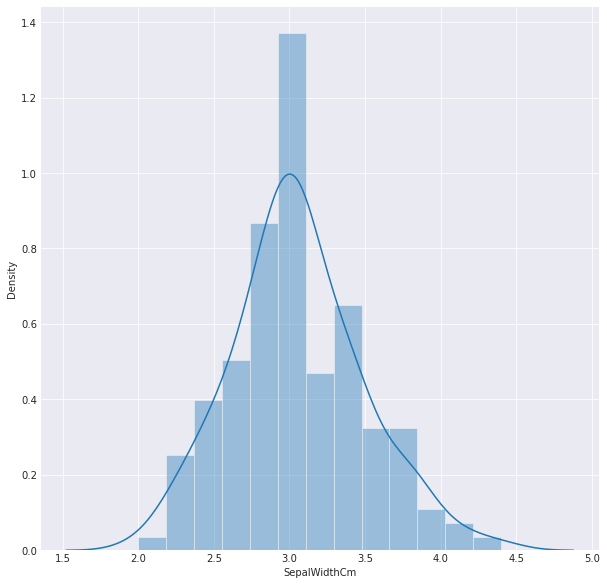

In [12]:
plt.figure(figsize=(10, 10))

sns.distplot(df["SepalWidthCm"]);

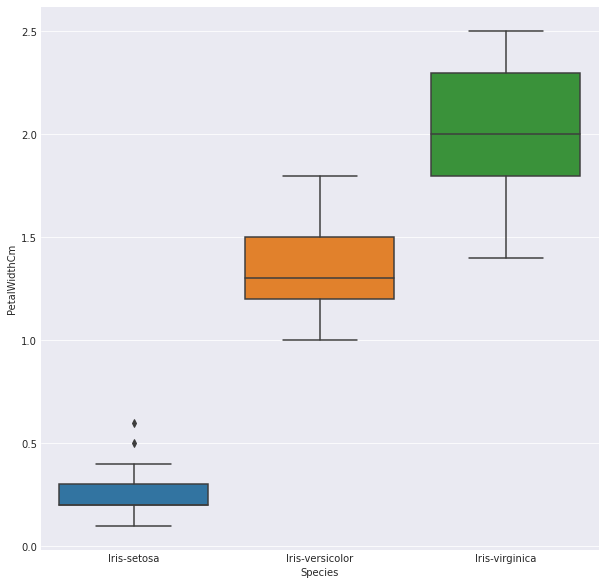

In [13]:
plt.figure(figsize=(10, 10))

sns.boxplot(data=df, x = 'Species', y = 'PetalWidthCm');

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

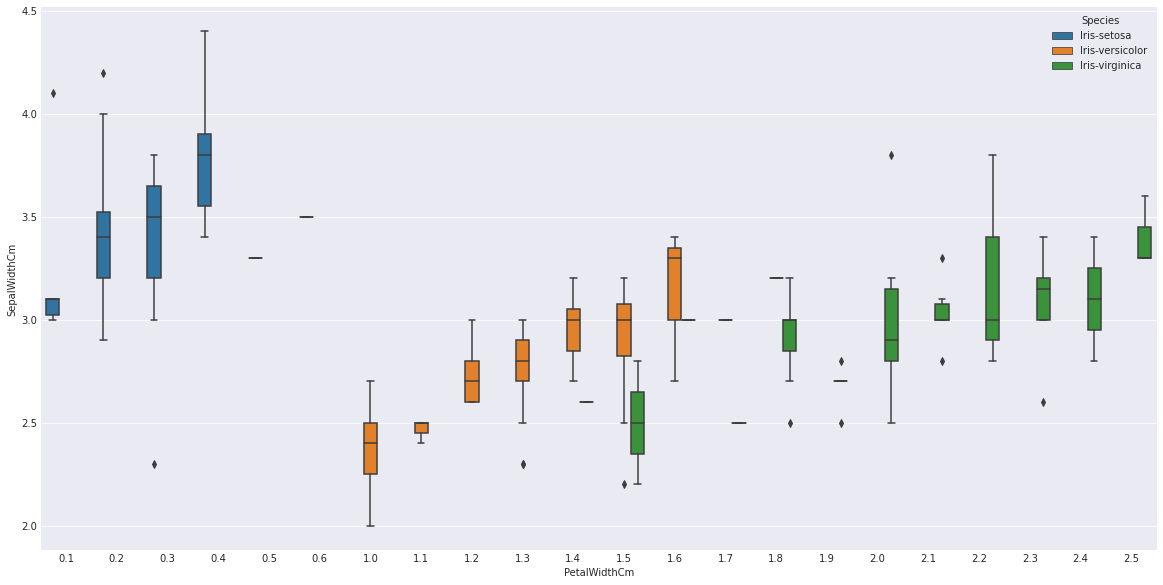

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = "PetalWidthCm", y = "SepalWidthCm", data = df, hue = "Species")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


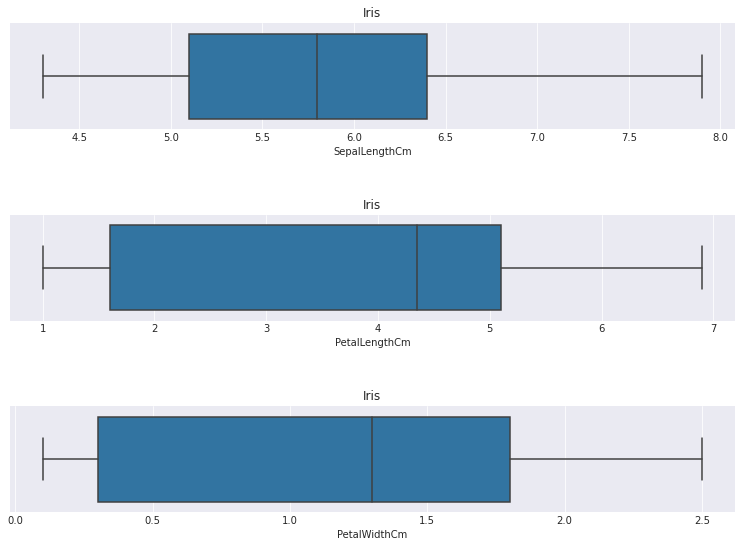

In [15]:
fig, axs = plt.subplots(nrows=3)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.subplots_adjust(hspace=0.8)

sns.boxplot(df['SepalLengthCm'], ax=axs[0]).set_title('Iris');
sns.boxplot(df['PetalLengthCm'], ax=axs[1]).set_title('Iris');
sns.boxplot(df['PetalWidthCm'],  ax=axs[2]).set_title('Iris');
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

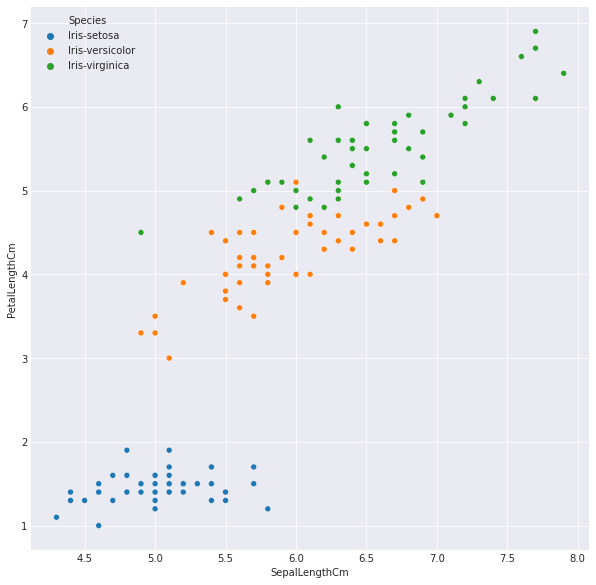

In [16]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = "SepalLengthCm", y = "PetalLengthCm", data = df, hue = "Species")

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

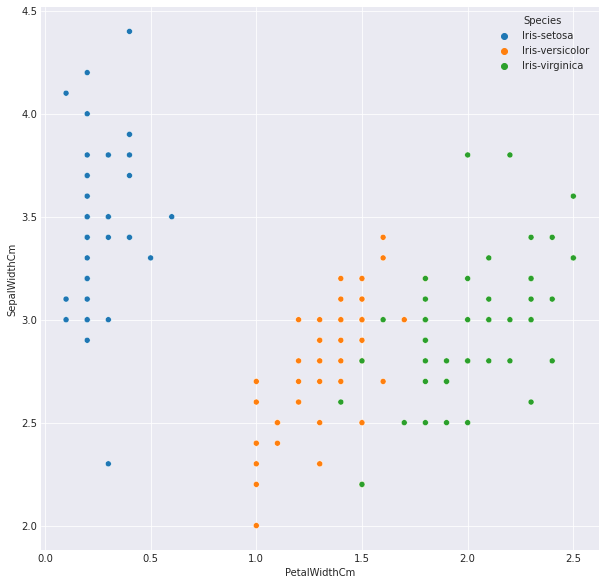

In [17]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = "PetalWidthCm", y = "SepalWidthCm", data = df, hue = "Species")

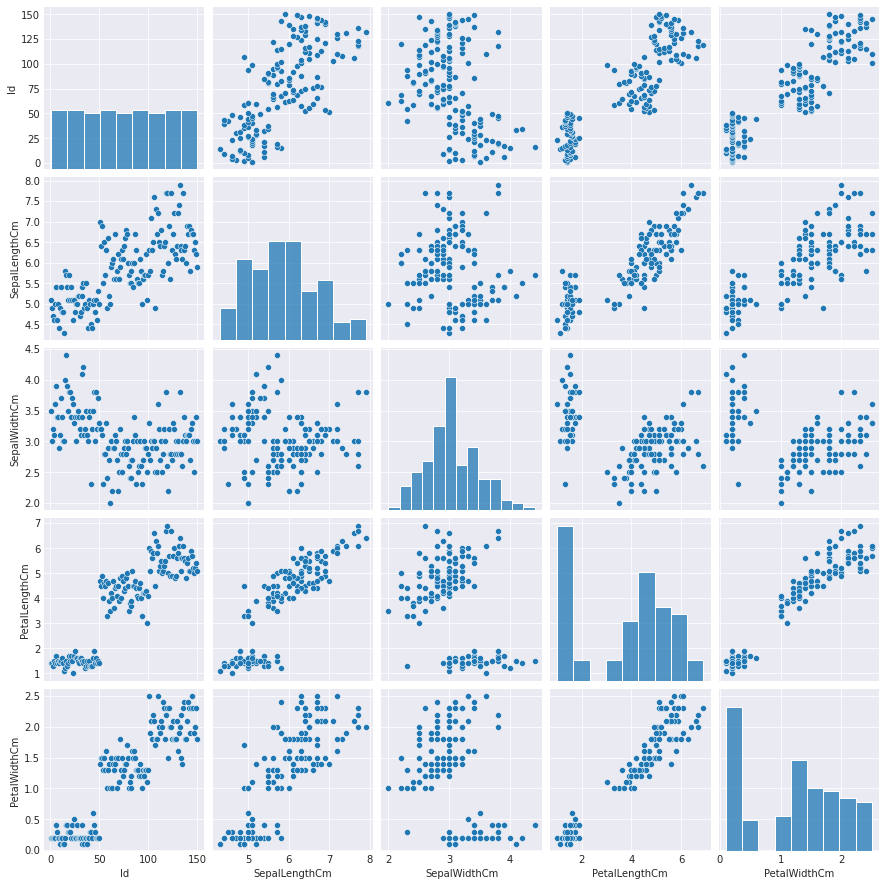

In [18]:
sns.pairplot(df)

In [19]:
x = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df[['Species']]

In [20]:
x.shape

(150, 5)

In [21]:
y.shape

(150, 1)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_train = scaler.fit_transform(x)
scaler_test = scaler.fit_transform(x)

In [23]:
scaler_train.shape

(150, 5)

In [24]:
scaler_test.shape

(150, 5)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

In [26]:
x_train.shape

(45, 5)

In [27]:
y_train.shape

(45, 1)

In [28]:
x_test.shape

(105, 5)

In [29]:
y_test.shape

(105, 1)

# Naive bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(x_train, y_train)
naive_pred = naive.predict(x_test)
naive_scor = naive.score(x_train, y_train)
naive_pred

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', '

In [31]:
naive_scor

0.9777777777777777

# K-NN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_fit= knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_scor = knn.score(x_train, y_train)
knn_scor

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9777777777777777

In [33]:
knn_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolo

#  Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

de_tree = DecisionTreeClassifier()
de_tree = de_tree.fit(x_train, y_train)
de_score = de_tree.score(x_train, y_train)
de_pred = de_tree.predict(x_test)
de_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', '

In [35]:
de_score

1.0

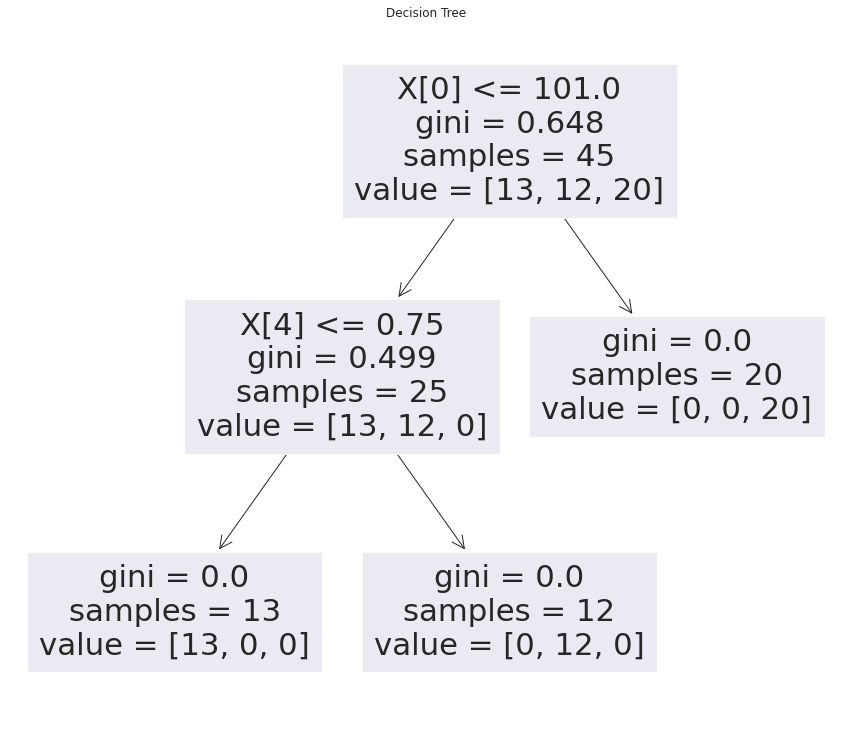

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(15, 13))

clf = tree.plot_tree(de_tree)
plt.title("Decision Tree")
plt.show();
plt.savefig("Decision_Tree_1")

In [37]:
from sklearn.metrics import accuracy_score

acuracia_naive_bayes = accuracy_score(y_test, naive_pred)
acuracia_KNN = accuracy_score(y_test, knn_pred)
acuracia_tree = accuracy_score(y_test, de_pred)

print("Acuracia model 1 - Naive bayes: %.3f" % (acuracia_naive_bayes * 100))
print("Acuracia model 2 - K-NN: %.3f" % (acuracia_KNN * 100))
print("Acuracia model 3 - Decision tree: %.3f" % (acuracia_tree * 100))

Acuracia model 1 - Naive bayes: 99.048
Acuracia model 2 - K-NN: 97.143
Acuracia model 3 - Decision tree: 99.048


In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Precision - Naive bayes = {}".format(precision_score(y_test, naive_pred, average='macro')))
print("Recall - Naive bayes = {}".format(recall_score(y_test, naive_pred, average='macro')))
print("Accuracy - Naive bayes = {}".format(accuracy_score(y_test, naive_pred)))
print("F1 Score - Naive bayes = {}".format(f1_score(y_test, naive_pred, average='macro')))
print("\n")

print("Precision - K-NN = {}".format(precision_score(y_test, knn_pred, average='macro')))
print("Recall - K-NN = {}".format(recall_score(y_test, knn_pred, average='macro')))
print("Accuracy - K-NN = {}".format(accuracy_score(y_test, knn_pred)))
print("F1 Score - K-NN = {}".format(f1_score(y_test, knn_pred, average='macro')))
print("\n")

print("Precision - Decision tree = {}".format(precision_score(y_test, de_pred, average='macro')))
print("Recall - Decision tree = {}".format(recall_score(y_test, de_pred, average='macro')))
print("Accuracy - Decision tree = {}".format(accuracy_score(y_test, de_pred)))
print("F1 Score - Decision tree = {}".format(f1_score(y_test, de_pred, average='macro')))
print("\n")

Precision - Naive bayes = 0.9914529914529915
Recall - Naive bayes = 0.9888888888888889
Accuracy - Naive bayes = 0.9904761904761905
F1 Score - Naive bayes = 0.9900212781568714


Precision - K-NN = 0.975609756097561
Recall - K-NN = 0.9687687687687688
Accuracy - K-NN = 0.9714285714285714
F1 Score - K-NN = 0.9712813092326735


Precision - Decision tree = 0.9914529914529915
Recall - Decision tree = 0.9888888888888889
Accuracy - Decision tree = 0.9904761904761905
F1 Score - Decision tree = 0.9900212781568714




In [39]:
from sklearn.metrics import classification_report

print("Naive bayes", classification_report(y_test, naive_pred))
print("\n")
print("K-NN", classification_report(y_test, knn_pred))
print("\n")
print("Decision tree", classification_report(y_test, de_pred))

Naive bayes                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      1.00      0.99        38
 Iris-virginica       1.00      0.97      0.98        30

       accuracy                           0.99       105
      macro avg       0.99      0.99      0.99       105
   weighted avg       0.99      0.99      0.99       105



K-NN                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.97      0.99        37
Iris-versicolor       0.93      1.00      0.96        38
 Iris-virginica       1.00      0.93      0.97        30

       accuracy                           0.97       105
      macro avg       0.98      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105



Decision tree                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      1.00      0.99

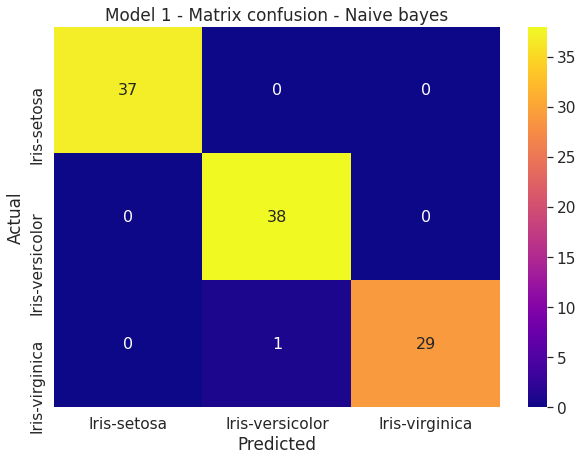

In [40]:
from sklearn.metrics import confusion_matrix

matrix_confusion_1 =  confusion_matrix(y_test, naive_pred)
matrix_confusion_2 =  confusion_matrix(y_test, knn_pred)
matrix_confusion_3 =  confusion_matrix(y_test, de_pred)

y_true  = ['Iris-setosa', 'Iris-virginica', "Iris-versicolor"]

matrix_confusion =  confusion_matrix(y_test, naive_pred)

df_cm = pd.DataFrame(matrix_confusion_1, columns=np.unique(y_true), index = np.unique(y_true))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)

plt.title("Model 1 - Matrix confusion - Naive bayes")
ax = sns.heatmap(df_cm, cmap = 'plasma', annot=True,annot_kws={"size": 16}, fmt = "")

<AxesSubplot:title={'center':'Model 2 - Matrix confusion - KNN'}, xlabel='Predicted', ylabel='Actual'>

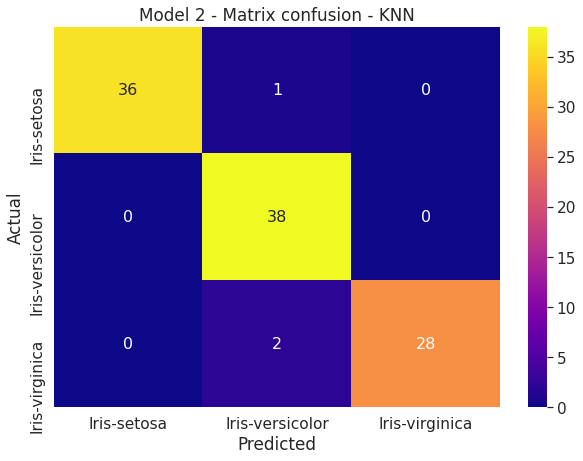

In [41]:
y_true  = ['Iris-setosa', 'Iris-virginica', "Iris-versicolor"]

matrix_confusion =  confusion_matrix(y_test, knn_pred)

df_cm = pd.DataFrame(matrix_confusion_2, columns=np.unique(y_true), index = np.unique(y_true))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)

plt.title("Model 2 - Matrix confusion - KNN")
sns.heatmap(df_cm, cmap = 'plasma', annot=True,annot_kws={"size": 16}, fmt = "")

<AxesSubplot:title={'center':'Model 3 - Matrix confusion - Tree'}, xlabel='Predicted', ylabel='Actual'>

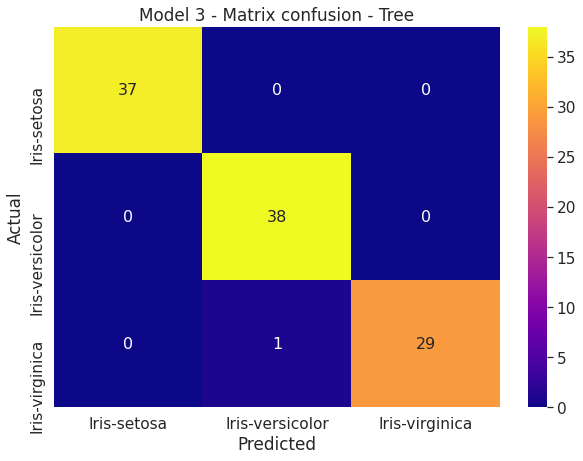

In [42]:
y_true  = ['Iris-setosa', 'Iris-virginica', "Iris-versicolor"]

matrix_confusion =  confusion_matrix(y_test, de_pred)

df_cm = pd.DataFrame(matrix_confusion_3, columns=np.unique(y_true), index = np.unique(y_true))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)

plt.title("Model 3 - Matrix confusion - Tree")
sns.heatmap(df_cm, cmap = 'plasma', annot=True,annot_kws={"size": 16}, fmt = "")

In [43]:
import pickle
 
with open('naive_pred.pkl', 'wb') as file:
    pickle.dump(naive_pred, file)
    
with open('knn_pred.pkl', 'wb') as file:
    pickle.dump(knn_pred, file)
    
with open('de_pred.pkl', 'wb') as file:
    pickle.dump(de_pred, file)